<a href="https://colab.research.google.com/github/paprikash21/bigdata-learning/blob/main/k-means/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Кластеризация методом k-средних
### Описание
Лабораторная работа №1.
Демо для демонстрации работы алгоритма кластеризации методом k-средних на примере решения задачи ирисов Фишера.
### Алгоритм
Алгоритм k-средних — это метод кластеризации данных, который разделяет набор данных на k кластеров, где k — заранее заданное число. Алгоритм начинается с случайного выбора k центроидов (первоначальных центров кластеров), затем каждая точка данных присваивается к ближайшему центроиду, и центр каждого кластера пересчитывается как среднее значение точек в этом кластере. Эти шаги повторяются до тех пор, пока центроиды и метки кластеров не стабилизируются или пока не достигнуто максимальное количество итераций. Результатом работы алгоритма является набор меток кластеров, разделяющих данные на группы, минимизируя среднее квадратичное расстояние между точками и их центроидами.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import KMeans

In [ ]:
iris = datasets.load_iris()
x = iris.data

In [ ]:
# Количество кластеров
k = 3

# Инициализация модели и кластеризация
model = KMeans(n_clusters=k)
model.fit(x)

labels = model.labels_
centers = model.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Перестроение меток кластеров, чтобы они соответствовали истинным меткам
# (с учетом того, что порядок меток может быть перепутан)
indexes = np.unique(labels, return_index=True)[1]
unique_labels = [labels[i] for i in sorted(indexes)]
label_mapping = {}

for new_label, old_label in enumerate(unique_labels):
    label_mapping[old_label] = new_label

labels = [label_mapping[label] for label in labels]

In [ ]:
print(f"labels:\n{np.array(labels)}")
print(f"target:\n{iris.target}")

labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print(f"centers:\n{centers}")

centers:
[[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [ ]:
# Оценка качества кластеризации
accuracy = accuracy_score(iris.target, labels)
silhouette_avg = silhouette_score(x, labels)

print(f"Accuracy:\t\t{accuracy:.2f}")
print(f"Silhouette Score:\t{silhouette_avg:.2f}")

Accuracy:		0.89
Silhouette Score:	0.55


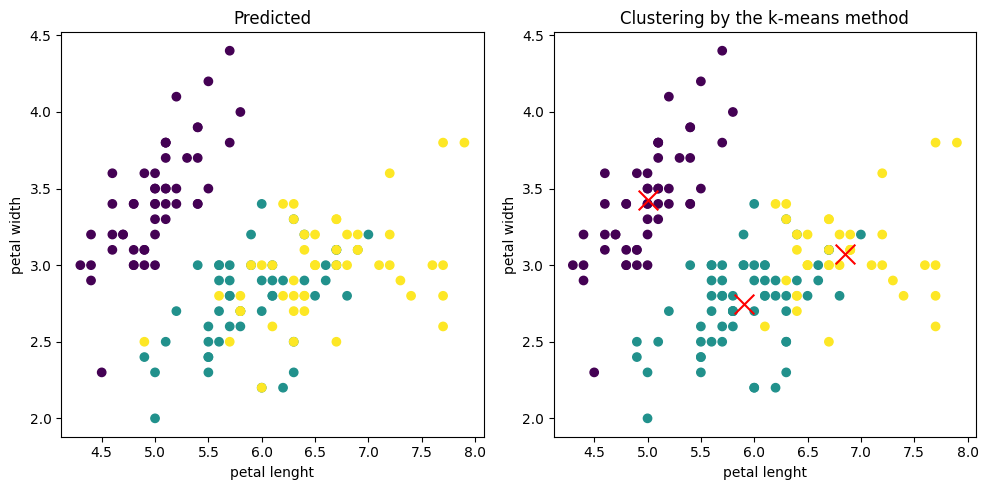

In [ ]:
# Визуализация результатов кластеризации
plt.figure(figsize=(10, 5))

# График исходных данных
plt.subplot(1, 2, 1)
plt.scatter(x[:, 0], x[:, 1], c=iris.target)
plt.title("Predicted")
plt.xlabel("petal lenght")
plt.ylabel("petal width")

# График с результатами кластеризации
plt.subplot(1, 2, 2)
plt.scatter(x[:, 0], x[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker="x", s=200, c="red")
plt.title("Сlustering by the k-means method")
plt.xlabel("petal lenght")
plt.ylabel("petal width")

plt.tight_layout()
plt.show()